# Exploratory Data Analysis (EDA) – Diabetes Health Indicators

This notebook explores the cleaned dataset to identify patterns, distributions, and relationships between features and diabetes outcomes.  

We will use visualisations and summary statistics to guide the hypothesis testing and machine learning stages.

# 1- Load Libraries & Dataset

We start by importing the required libraries and loading the cleaned dataset (`combined_cleaned_final.csv`), which contains human-readable features suitable for EDA and hypothesis testing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("../data/combined_cleaned_final.csv")

# Quick check
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,source,Diabetes_binary
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,original,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,original,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,original,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,original,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,original,0.0


# 2- Dataset Overview

We will inspect the dataset shape, column names, data types, and basic statistics to understand its structure before visualisation.

In [2]:
# Shape and column info
print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()

Dataset shape: (528312, 24)

Data types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
source                   object
Diabetes_binary         float64
dtype: object

Missing values:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
St

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,...,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000,528312.000000
mean,0.141627,0.469664,0.453416,0.961508,28.852494,0.467849,0.047250,0.109498,0.728399,0.611885,...,0.093293,2.635759,3.551078,4.843823,0.195169,0.441421,8.153563,4.969715,5.858368,0.132865
std,0.504414,0.499079,0.497826,0.192382,6.849304,0.498966,0.212174,0.312263,0.444786,0.487322,...,0.290843,1.074200,7.785794,9.208488,0.396331,0.496557,3.069303,0.998136,2.105235,0.339429
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


# 3- Class Balance (Matplotlib)

### Diabetes Class Distribution 
We start by checking the balance between the target classes (`Diabetes_binary`).  
This helps us understand whether class imbalance may affect model performance.

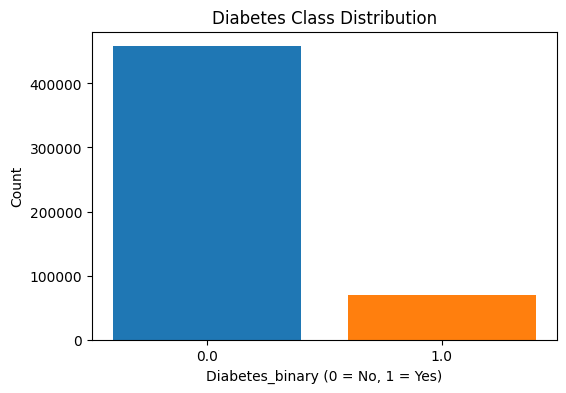

In [3]:
# Class Balance
class_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes_binary (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 4- BMI Distribution (Seaborn)

### BMI Distribution by Diabetes Status

BMI is an important health indicator. We plot its distribution grouped by diabetes status.

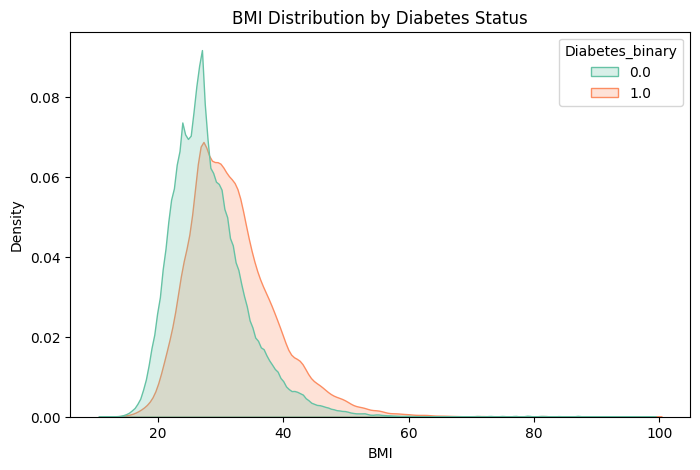

In [4]:
# Plotting BMI distribution by diabetes status
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="BMI", hue="Diabetes_binary", fill=True, common_norm=False, palette="Set2")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

# 5- Diabetes by Age Group (Plotly)

### Diabetes Prevalence by Age Group

We use an interactive Plotly bar chart to visualise the relationship between age group and diabetes prevalence.

In [5]:
age_diabetes = df.groupby("Age")["Diabetes_binary"].mean().reset_index()
age_diabetes["Diabetes_binary"] = age_diabetes["Diabetes_binary"] * 100  # percentage

fig = px.bar(
    age_diabetes,
    x="Age",
    y="Diabetes_binary",
    title="Diabetes Prevalence by Age Group",
    labels={"Diabetes_binary": "Diabetes Prevalence (%)", "Age": "Age Group Code"},
    color="Diabetes_binary",
    color_continuous_scale="Viridis"
)
fig.show()

# 6- Potential relationships with diabetes- Correlation Heatmap (Seaborn)

### Feature Correlation Heatmap

We create a heatmap to visualise correlations between numeric features and identify potential relationships with diabetes.

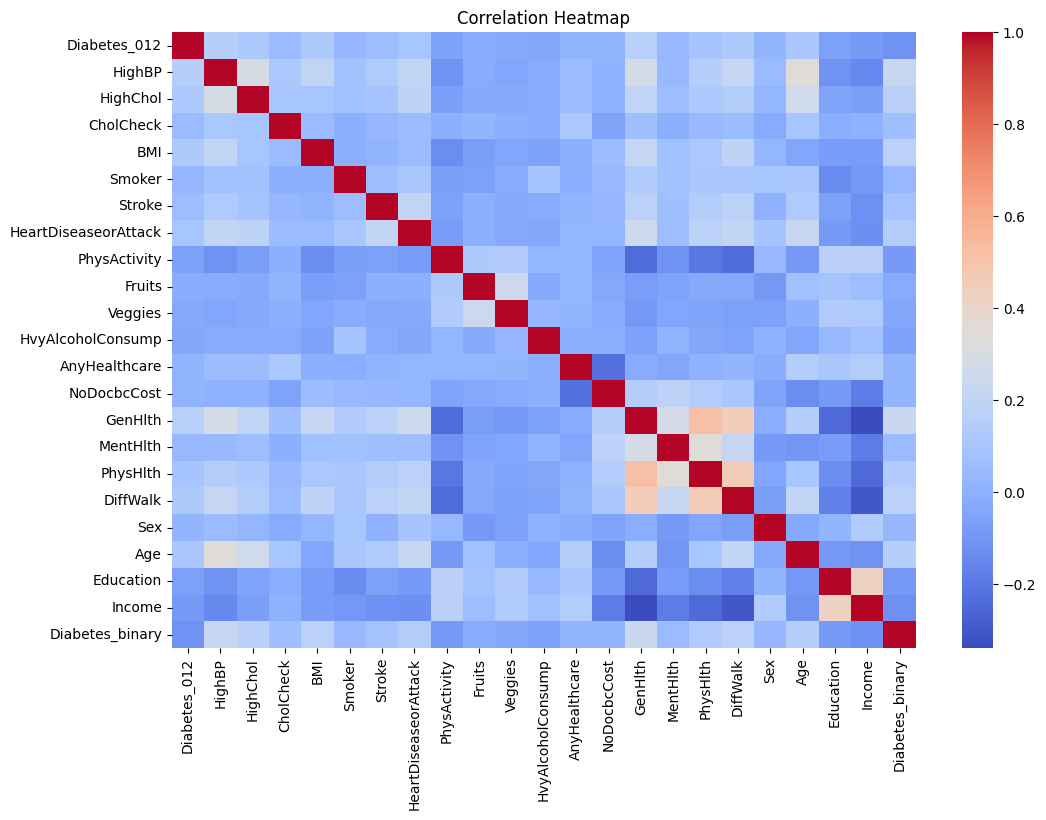

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 7- Summary

### Summary of EDA Findings
- The dataset is large and balanced towards non-diabetic cases.
- Higher BMI appears more common among diabetic respondents.
- Diabetes prevalence increases with age group.
- Certain features (e.g., HighBP, HighChol) may have stronger correlations with diabetes.

These insights will guide the formulation of hypotheses in the next stage.